### Obesity Prediction Based on multiple health factors

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight


In [16]:
#Check Nulls
df[df.isnull().any(axis=1)]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
Gender                            2111 non-null object
Age                               2111 non-null float64
Height                            2111 non-null float64
Weight                            2111 non-null float64
family_history_with_overweight    2111 non-null object
FAVC                              2111 non-null object
FCVC                              2111 non-null float64
NCP                               2111 non-null float64
CAEC                              2111 non-null object
SMOKE                             2111 non-null object
CH2O                              2111 non-null float64
SCC                               2111 non-null object
FAF                               2111 non-null float64
TUE                               2111 non-null float64
CALC                              2111 non-null object
MTRANS                            2111 non-null object
NObey

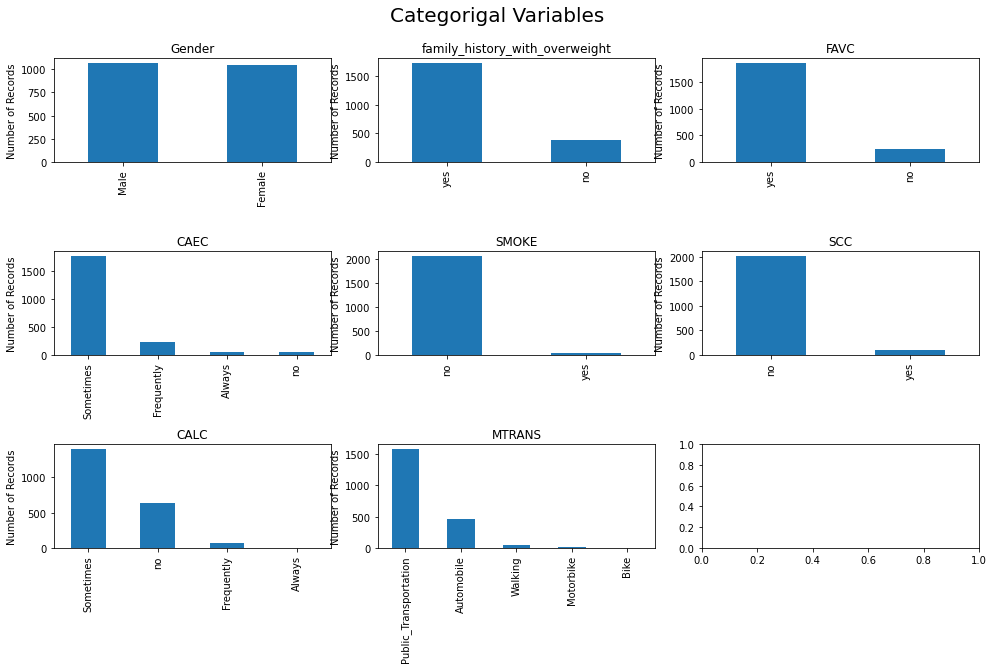

In [127]:
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
           'SCC', 'CALC', 'MTRANS']

fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for col, subplot in zip(columns, ax.flatten()):
    df[col].value_counts().plot(kind='bar', ax = subplot)      
    subplot.yaxis.label.set_text("Number of Records")
    subplot.title.set_text(col)
        
# show figure & plots
fig.suptitle("Categorigal Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.0, h_pad=1)
plt.savefig('Categorical Featurs distribution.svg', format='svg', dpi=1200,bbox_inches='tight')
plt.show()

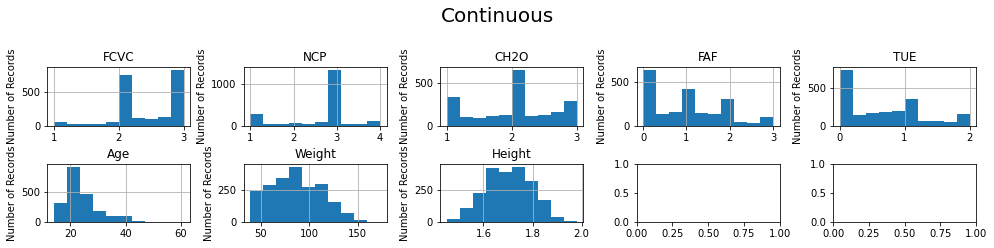

In [125]:
columns = ["FCVC", "NCP", "CH2O", "FAF", "TUE",'Age','Weight', 'Height']
fig, ax = plt.subplots(2, 5, figsize=(15, 4))
for col, subplot in zip(columns, ax.flatten()):
    df[col].hist(ax = subplot)      
    subplot.yaxis.label.set_text("Number of Records")
    subplot.title.set_text(col)

plt.tight_layout(pad=5, w_pad=0.7, h_pad=0.5)
fig.suptitle("Continuous", fontsize=20)
plt.savefig('Contimuous Featurs distribution.svg', format='svg', dpi=1200,bbox_inches='tight')
plt.show()

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


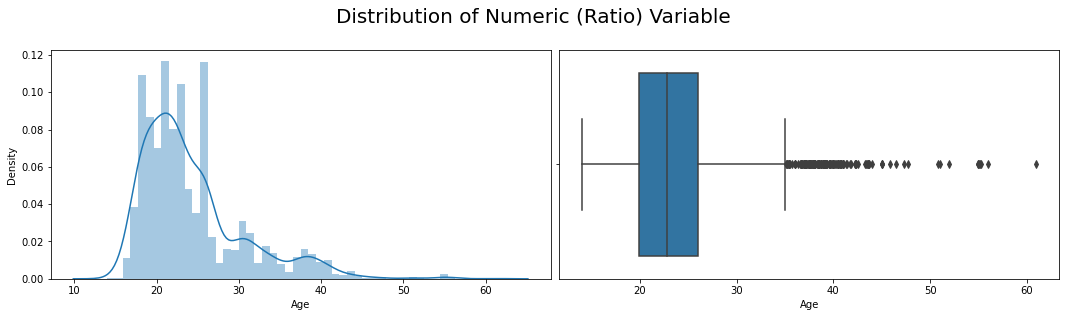

In [112]:
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(121)
sns.distplot(df["Age"], kde=True)
ax1 = ax1 = fig.add_subplot(122)
sns.boxplot(df.Age)
fig.suptitle("Distribution of Numeric (Ratio) Variable", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=.1)
plt.show()

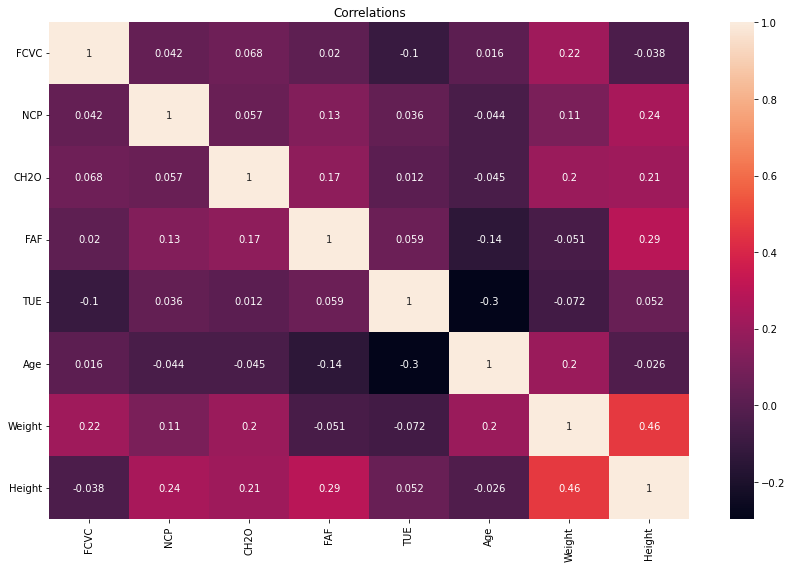

In [123]:
corr = df[["FCVC", "NCP", "CH2O", "FAF", "TUE",'Age','Weight', 'Height']].corr()

sns.heatmap(corr,annot = True)

plt.title('Correlations')
plt.tight_layout(rect=[0,0,2,2])
plt.savefig('Correlation.svg', format='svg', dpi=1200,bbox_inches='tight')
plt.show()

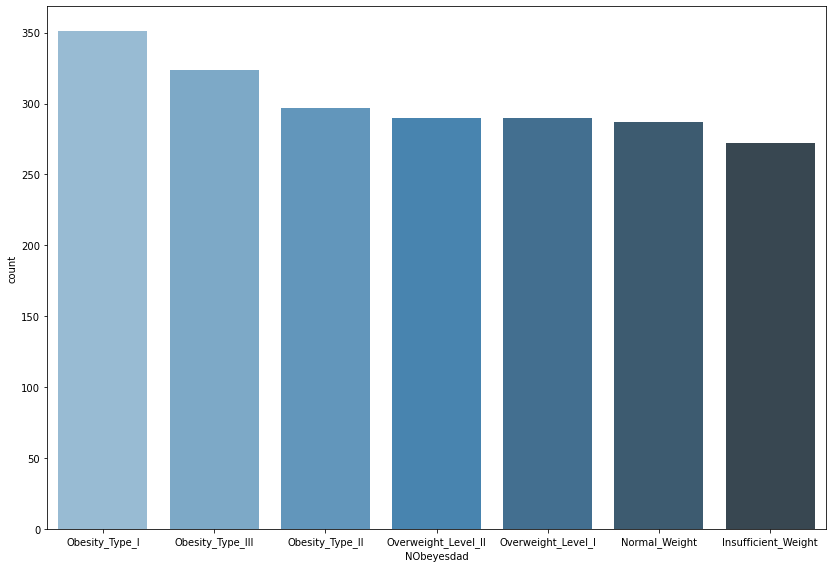

In [122]:
sns.countplot(x="NObeyesdad",                  
                 palette="Blues_d", 
                 order=df.NObeyesdad.value_counts().index,
                 data=df)
plt.tight_layout(rect=[0,0,2,2])
plt.savefig('Target Distribution.svg', format='svg', dpi=1200,bbox_inches='tight')
plt.show()

In [115]:
def cross_plot(dataset, lead_category, sup_category, order = None):
    """
    Function: Plots interaction between two categorical variables.
    
    Parameters: Dataset, lead category, suplemental category, and order of appearance (order is optional).
    """
    
    sns.countplot(x = lead_category, hue = sup_category, data = dataset, order = order, palette = "Blues_r")
    

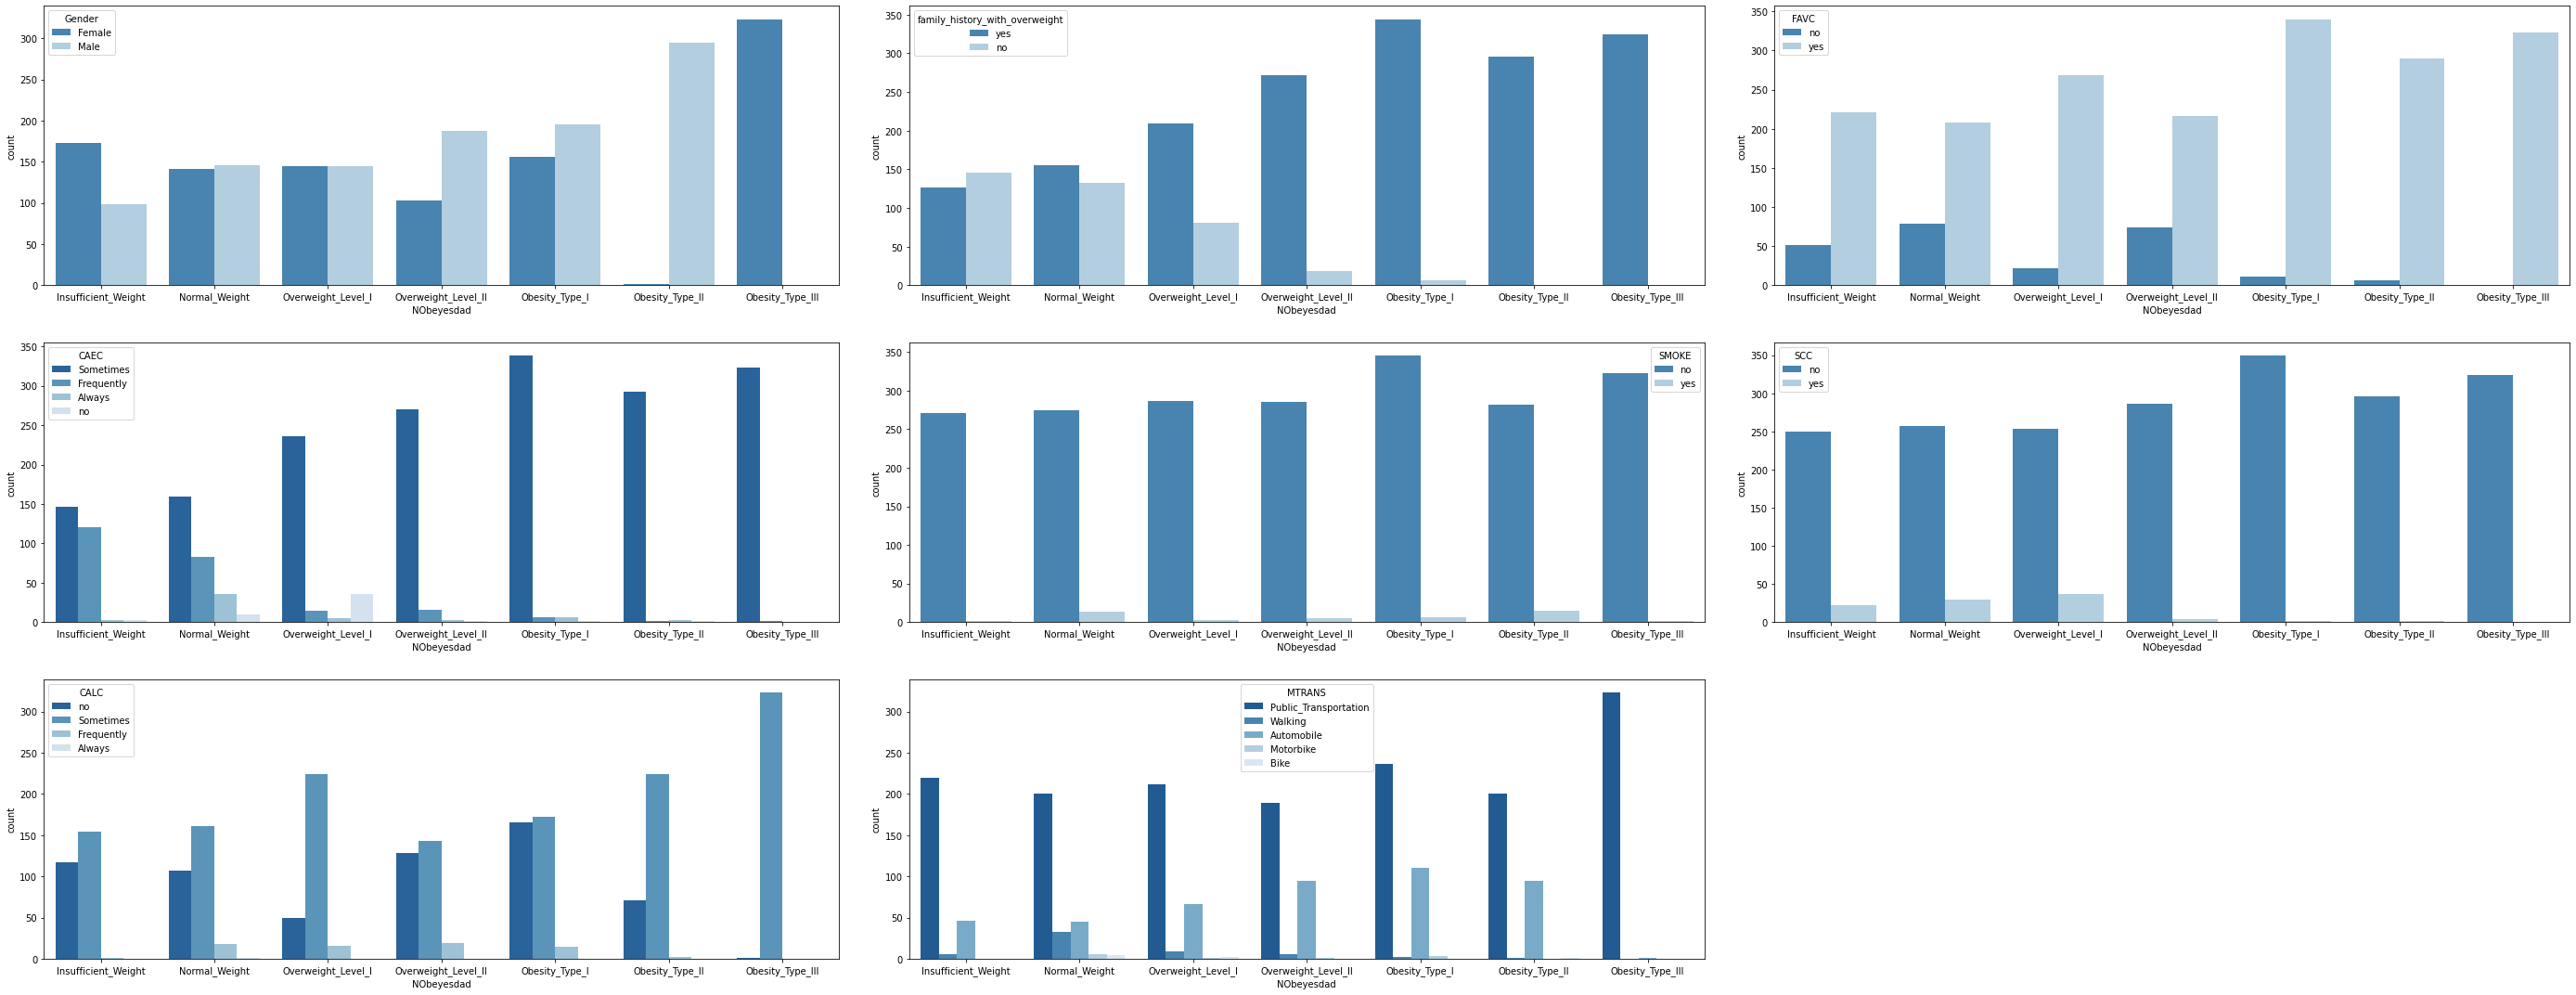

In [121]:
plt.figure(figsize = (13, 5))
i = 1
for col in columns:
    plt.subplot(3,3,i)
    cross_plot(df, "NObeyesdad", col, ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])
    i=i+1
plt.tight_layout(rect = [0,0,3,3] )

plt.savefig('Cate vs Target.svg', format='svg', dpi=1200,bbox_inches='tight')

In [119]:
from scipy.stats import chi2_contingency

columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
           'SCC', 'CALC', 'MTRANS']
prob = 0.95
alpha = 1.0 - prob
ps =[]
criticals =[]

for col in columns:  
    temp = pd.crosstab(df[col], df.NObeyesdad)
    stat, p, dof, expected = chi2_contingency(temp)
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)


In [142]:
from sklearn.preprocessing import LabelEncoder
le_Gender = LabelEncoder()
le_Gender.fit(df['Gender'].unique())
df_with_Encoding = df.copy()
df_with_Encoding.Gender = le_Gender.transform(df.Gender)
df_with_Encoding.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight


In [234]:
from sklearn.preprocessing import LabelEncoder

columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE',
           'SCC','NObeyesdad']

df_with_Encoding = df.copy()
encoders = {}

for col in columns:
    le = LabelEncoder()
    le.fit(df[col])
    df_with_Encoding[col] = le.transform(df[col])
    encoders[col] = le


In [235]:
mapping = {'no':0,'Sometimes':1,"Always":3,'no':4,'Frequently':2}

df_with_Encoding['CAEC'] = df['CAEC'].apply(lambda x: mapping[x])
df_with_Encoding['CALC'] = df['CALC'].apply(lambda x: mapping[x])


In [236]:
df_with_Encoding = pd.get_dummies(df_with_Encoding,prefix=['MTRANS'], columns = ['MTRANS'], drop_first=True)

In [237]:
df_with_Encoding.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,4,1,0,0,1,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1,0,0,1,0


In [238]:
X = df_with_Encoding.drop(columns=["NObeyesdad","Height","Weight"])
y = df_with_Encoding['NObeyesdad'] 

In [239]:
X

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,4,0,0,1,0
1,0,21.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,0,0,1,0
2,1,23.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,0,0,1,0
3,1,27.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,0,0,0,1
4,1,22.000000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,0,1,0
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,0,1,0
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,0,1,0
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,0,1,0


In [240]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [246]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler

In [249]:
def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    
    models = [          
          ('Random Forest', RandomForestClassifier()),                                                 
          ('SVM', SVC(),
        ]  
    continuous__columns = ["FCVC", "NCP", "CH2O", "FAF", "TUE",'Age']

    X_train_std = X_train.copy()

    for col in continuous__columns:
        X_train_std[col] = StandardScaler().fit_transform(X_train[col].values.reshape(-1,1))

    
    for name, model in models:        
        # unscaled data
        clf = model.fit(X_train_std, y_train)
        X_test_std = X_test.copy()

        for col in continuous__columns:
            X_test_std[col] = StandardScaler().fit(X_train[col].values.reshape(-1,1)).transform(X_test[col].values.reshape(-1,1))
        y_pred = clf.predict(X_test_std)
        
  
        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        
        # output
        print(name + ':')        
        print("---------------------------------------------------------------")      
        print("Accuracy:", accuracy)
        print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred))
      


In [250]:
run_models(X_train, y_train, X_test, y_test)

Random Forest:
---------------------------------------------------------------
Accuracy: 0.847

Classification Report (mm):
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        92
           1       0.60      0.82      0.69        77
           2       0.90      0.80      0.85       114
           3       0.93      0.92      0.92        85
           4       0.99      0.99      0.99        92
           5       0.84      0.72      0.78        89
           6       0.79      0.80      0.80        85

    accuracy                           0.85       634
   macro avg       0.85      0.85      0.85       634
weighted avg       0.86      0.85      0.85       634

Decision Tree:
---------------------------------------------------------------
Accuracy: 0.74448

Classification Report (mm):
               precision    recall  f1-score   support

           0       0.80      0.75      0.78        92
           1       0.49      0.62      0.5

In [243]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{
'n_estimators': [10, 30, 50, 70, 90],
'criterion': ["gini", "entropy"],
'max_depth': [10, 50, 100, 200],
'random_state': [42]
}]

grid = GridSearchCV(RandomForestClassifier(), tuned_parameters)
grid.fit(X_train, y_train.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [245]:
print('Best Hyperparameters: %s' % grid.best_params_)
# print('Best Accuracy: %s' % rf_gs.best_score_)
y_pred_rf = grid.best_estimator_.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))
print("F1:", metrics.classification_report(y_test, y_pred_rf))

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 50, 'n_estimators': 70, 'random_state': 42}
Accuracy: 0.8517350157728707
F1:               precision    recall  f1-score   support

           0       0.92      0.90      0.91        92
           1       0.58      0.83      0.68        77
           2       0.91      0.82      0.86       114
           3       0.95      0.92      0.93        85
           4       0.99      0.99      0.99        92
           5       0.85      0.72      0.78        89
           6       0.81      0.79      0.80        85

    accuracy                           0.85       634
   macro avg       0.86      0.85      0.85       634
weighted avg       0.87      0.85      0.86       634



In [213]:
tuned_parameters = [{
'criterion': ["gini", "entropy"],
'max_depth': [10, 50, 100, 200,None],
}]

grid = GridSearchCV(DecisionTreeClassifier(), tuned_parameters)
grid.fit(X_train, y_train.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
               

In [214]:
print('Best Hyperparameters: %s' % grid.best_params_)
# print('Best Accuracy: %s' % rf_gs.best_score_)
y_pred_rf = grid.best_estimator_.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))
print("F1:", metrics.classification_report(y_test, y_pred_rf))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 50}
Accuracy: 0.9337539432176656
F1:               precision    recall  f1-score   support

           0       0.96      0.96      0.96        92
           1       0.90      0.81      0.85        77
           2       0.92      0.96      0.94       114
           3       0.96      0.96      0.96        85
           4       1.00      0.99      0.99        92
           5       0.85      0.94      0.89        89
           6       0.95      0.88      0.91        85

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634



Feature: 0, Score: 0.15969
Feature: 1, Score: 0.04519
Feature: 2, Score: 0.22935
Feature: 3, Score: 0.46710
Feature: 4, Score: 0.00158
Feature: 5, Score: 0.02261
Feature: 6, Score: 0.01407
Feature: 7, Score: 0.01037
Feature: 8, Score: 0.00123
Feature: 9, Score: 0.00029
Feature: 10, Score: 0.00737
Feature: 11, Score: 0.00179
Feature: 12, Score: 0.00523
Feature: 13, Score: 0.00552
Feature: 14, Score: 0.02377
Feature: 15, Score: 0.00151
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00206
Feature: 18, Score: 0.00127


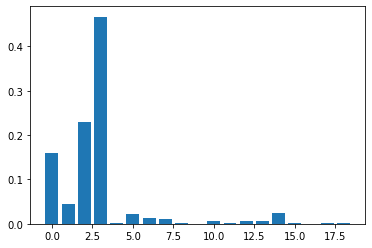

In [227]:
m= DecisionTreeClassifier()
m.fit(X_train, y_train)
m.feature_importances_
importance = m.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [254]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.4s
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [260]:


X_test_std = X_test.copy()
continuous__columns = ["FCVC", "NCP", "CH2O", "FAF", "TUE",'Age']

for col in continuous__columns:
    X_test_std[col] = StandardScaler().fit(X_train[col].values.reshape(-1,1)).transform(X_test[col].values.reshape(-1,1))
y_pred = rf_random.predict(X_test_std)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))
print("F1:", metrics.classification_report(y_test, y_pred_rf))

Accuracy: 0.8517350157728707
F1:               precision    recall  f1-score   support

           0       0.92      0.90      0.91        92
           1       0.58      0.83      0.68        77
           2       0.91      0.82      0.86       114
           3       0.95      0.92      0.93        85
           4       0.99      0.99      0.99        92
           5       0.85      0.72      0.78        89
           6       0.81      0.79      0.80        85

    accuracy                           0.85       634
   macro avg       0.86      0.85      0.85       634
weighted avg       0.87      0.85      0.86       634



In [262]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)